<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#KNN" data-toc-modified-id="KNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forests</a></span></li></ul></div>

# KNN

In [82]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [83]:
df=pd.read_csv("airline_satisfaction_final.csv", index_col = 0,
              #nrows = 100
              )

In [84]:
y = df.satisfaction_satisfied.values

X = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Type of Travel_Business travel',
       'Class_Business', 'Class_Eco Plus',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']]

In [85]:
pca = PCA(n_components=2)
pca.fit(X)
print(f"ratio variance expliquée : {pca.explained_variance_ratio_}")
print(f"valeurs pca : {pca.singular_values_}")
X_pca = pca.transform(X)
print("Original shape :{}".format(str(X.shape)))
print("Reduced shape :{}".format(str(X_pca.shape)))

ratio variance expliquée : [0.21297042 0.12804819]
valeurs pca : [235.92235685 182.93473445]
Original shape :(129880, 22)
Reduced shape :(129880, 2)


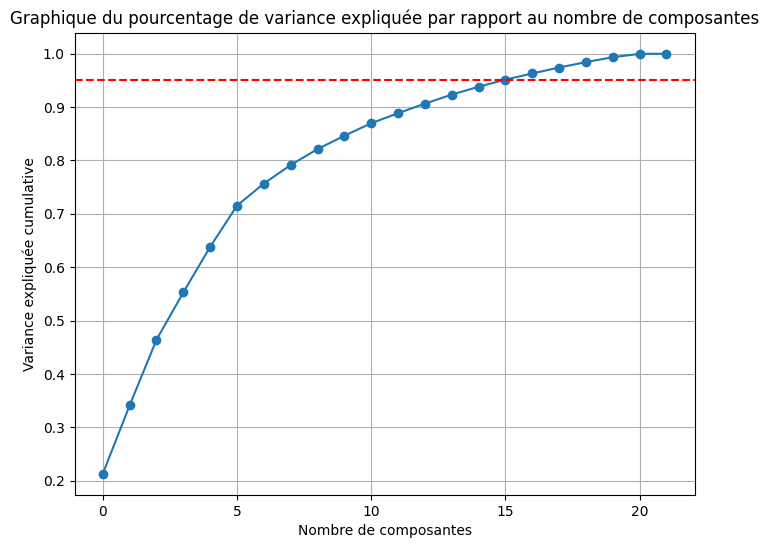

In [86]:
pca = PCA()
pca.fit(X)

# Calculer le pourcentage de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_

# Tracer le graphique du pourcentage de variance expliquée
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulative')
plt.title('Graphique du pourcentage de variance expliquée par rapport au nombre de composantes')
plt.axhline(y=0.95, color='r', linestyle='--')  # Ajouter la ligne horizontale à 0.8
plt.grid(True)
plt.savefig(f'/home/estelle/robotlearn/airline_satisfaction/figures/pca.png')
plt.show()

In [87]:
# Effectuer la PCA
pca = PCA()
pca.fit(X)

# Calculer le pourcentage de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_

# Calculer la variance cumulée expliquée
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Trouver le nombre de composantes pour atteindre un certain pourcentage de variance expliquée
target_variance_ratio = 0.95  # Vous pouvez changer cela selon vos besoins
n_components = np.argmax(cumulative_explained_variance_ratio >= target_variance_ratio) + 1

print("Nombre de composantes pour atteindre {} de variance expliquée : {}".format(
    target_variance_ratio, n_components))

Nombre de composantes pour atteindre 0.95 de variance expliquée : 16


In [88]:
column_names = X.columns.tolist()
pca = PCA(n_components=n_components)
pca.fit(X)
print(f"ratio variance expliquée : {pca.explained_variance_ratio_}")
print(f"valeurs pca : {pca.singular_values_}")
X_pca = pca.transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=["PCA_Component_{}".format(i) for i in range(X_pca.shape[1])])
print("Original shape :{}".format(str(X.shape)))
print("Reduced shape :{}".format(str(X_pca.shape)))

ratio variance expliquée : [0.21297042 0.12804819 0.12303346 0.08870762 0.08526515 0.07742223
 0.04118191 0.03486837 0.02978151 0.0249383  0.02355905 0.01873641
 0.01797054 0.01683444 0.01476939 0.01337634]
valeurs pca : [235.92235685 182.93473445 179.31684252 152.26143944 149.27780495
 142.24672891 103.74393062  95.46085297  88.22319844  80.73146705
  78.46723877  69.97657858  68.53147138  66.32982115  62.12848863
  59.12595441]
Original shape :(129880, 22)
Reduced shape :(129880, 16)


In [89]:
satisfaction_satisfied = df['satisfaction_satisfied'].values  # Assurez-vous que satisfaction_satisfied a une forme de (129880,)

# Ajouter la colonne 'satisfaction_satisfied' à X_pca
X_pca_with_satisfaction = np.column_stack((X_pca, satisfaction_satisfied))

In [90]:
X = X_pca
y = df['satisfaction_satisfied'].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [92]:
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0


for i in range(1, 11, 1):
    #euclidian_distance
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(X_train, y_train)
    print(f"k={i}")
    prediction = knn.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    precision = precision_score(y_test, prediction)
    print(f"Precision: {accuracy_score(y_test, prediction)}")
    split_precision.append(precision_score(y_test, prediction))
    recall = recall_score(y_test, prediction)
    print(f"Recall: {recall_score(y_test, prediction)}")
    split_recall.append(recall_score(y_test, prediction))
    f1 = f1_score(y_test, prediction)
    print(f"F1: {f1_score(y_test, prediction)}")
    split_f1.append(f1_score(y_test, prediction))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k_acc = i
        
    if precision > best_precision:
        best_precision = precision
        best_k_pr = i
    
    if recall > best_recall:
        best_recall = recall
        best_k_re = i
        
    if f1 > best_f1:
        best_f1 = f1
        best_k_f1 = i

print(f"Meilleur k avec la meilleure accuracy: k={best_k_acc}, accuracy={best_accuracy} \n Meilleur k avec la meilleur precision: k={best_k_pr}, precision = {best_precision} \n Meilleur k avec le meilleur recall: k={best_k_re}, recall = {best_recall} \n Meilleur k avec le meilleur f1: k={best_k_f1}, f1 = {best_f1}")

k=1
Accuracy: 0.9041807822605482
Precision: 0.9041807822605482
Recall: 0.8760411128832182
F1: 0.8882001527197592
k=2
Accuracy: 0.9067215891592239
Precision: 0.9067215891592239
Recall: 0.8189792663476874
F1: 0.884116887464728
k=3
Accuracy: 0.9194256236526024
Precision: 0.9194256236526024
Recall: 0.8800283537125643
F1: 0.9046773238602724
k=4
Accuracy: 0.9155374191561442
Precision: 0.9155374191561442
Recall: 0.8454722665248982
F1: 0.8968888053388477
k=5
Accuracy: 0.9200800739143825
Precision: 0.9200800739143825
Recall: 0.8767499556973242
F1: 0.905058081039056
k=6
Accuracy: 0.9164613489374808
Precision: 0.9164613489374808
Recall: 0.8521176679071416
F1: 0.8986170809194542
k=7
Accuracy: 0.920349553433939
Precision: 0.920349553433939
Recall: 0.8762183235867447
F1: 0.9052959216368381
k=8
Accuracy: 0.9175007699414844
Precision: 0.9175007699414844
Recall: 0.8569023569023569
F1: 0.900255992552944
k=9
Accuracy: 0.9196566060979365
Precision: 0.9196566060979365
Recall: 0.8745348219032429
F1: 0.90438

K-fold validation

In [93]:
knn = KNeighborsClassifier(n_neighbors=best_k_acc,p=2)
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy = np.mean(cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy", cv=kfold))
cross_val_accuracy_std = np.std(cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy", cv=kfold))
print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_std}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

K-fold validation score [0.92161996 0.9171543  0.92254389 0.91684632 0.92285186 0.92315984
 0.92408377 0.92577764 0.92593163 0.92331383 0.92254389 0.92485371
 0.92346782 0.92146597 0.92531568 0.91915614 0.92346782 0.92131198
 0.92993532 0.92115799]
Average k-fold validation score : 0.922797967354481
Average error on fold: 0.0035836289319042917
Standard error on fold: 0.0035836289319042917


In [94]:
knn = KNeighborsClassifier(n_neighbors=best_k_pr)
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=knn, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision = np.mean(cross_val_score(estimator=knn, X=X, y=y, scoring="precision", cv=kfold))
cross_val_precision_std = np.std(cross_val_score(estimator=knn, X=X, y=y, scoring="precision", cv=kfold))
print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_std}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

K-fold validation score [0.96351575 0.95668317 0.9589852  0.96101203 0.95222405 0.96109937
 0.95791667 0.96052079 0.95967078 0.96427105 0.9545644  0.95159338
 0.96822121 0.95628866 0.95639654 0.95565686 0.96689824 0.96163575
 0.96346073 0.96213992]
Average k-fold validation score : 0.9596377280079661
Average error on fold: 0.0035836289319042917
Standard error on fold: 0.0035836289319042917


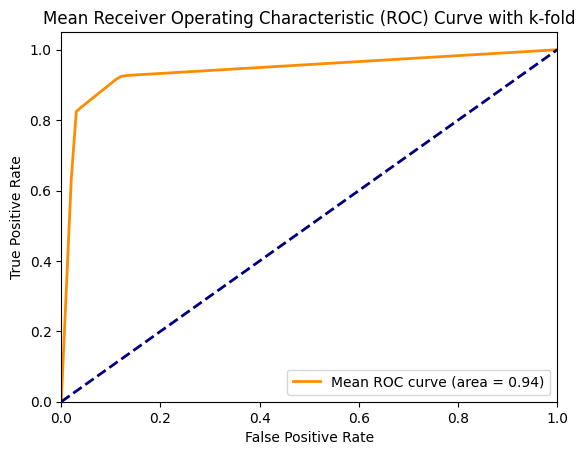

In [117]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Créer le modèle KNN avec le nombre de voisins optimal
knn = KNeighborsClassifier(n_neighbors=best_k_pr)

# Initialiser la validation croisée k-fold
kfold = KFold(n_splits=20, shuffle=True)

# Initialiser les listes pour stocker les résultats de la validation croisée
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

# Effectuer la validation croisée k-fold
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Entraîner le modèle sur l'ensemble d'entraînement du pli actuel
    knn.fit(X_train_fold, y_train_fold)
    
    # Obtenir les probabilités de prédiction pour la classe positive sur l'ensemble de test du pli actuel
    proba_matrix_fold = knn.predict_proba(X_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, proba_matrix_fold[:, 1])
    
    # Interpoler les taux de vrais positifs sur un ensemble de faux positifs uniformément répartis
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    
# Calculer la moyenne des taux de vrais positifs sur tous les plis
mean_tpr /= kfold.get_n_splits()

# Calculer l'aire sous la courbe ROC
roc_auc = auc(mean_fpr, mean_tpr)

# Tracer la courbe ROC moyenne
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [106]:
gaussian_full = GaussianNB()

print("======= Training")
gaussian_full.fit(X, y)

print("======= Prediction")
predictions = gaussian_full.predict(X)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86     73452
         1.0       0.84      0.75      0.79     56428

    accuracy                           0.83    129880
   macro avg       0.83      0.82      0.82    129880
weighted avg       0.83      0.83      0.83    129880



<Axes: >

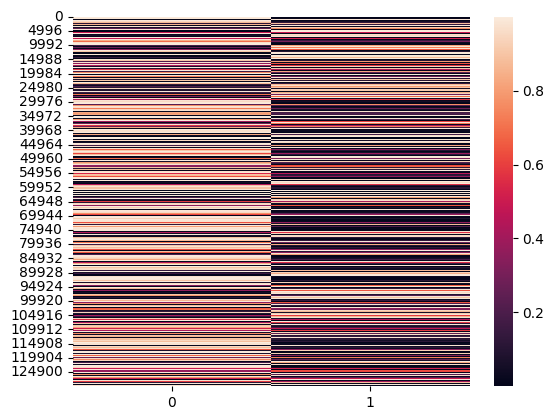

In [107]:
predicted_proba = gaussian_full.predict_proba(X)
sns.heatmap(predicted_proba)

In [ ]:
predicted_proba = gaussian_nb.predict_proba(X)
plt.scatter(X.values[:,1], X.values[:,2],c=predicted_proba[:,0])

In [109]:
gaussian_full = GaussianNB()

print(f"== Working with accuracy")

scores = cross_val_score(estimator=gaussian_full, X=X, y=y)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Median accuracy: {np.median(scores)}")

print(f"== Working with precision")

scores = cross_val_score(estimator=gaussian_full, X=X, y=y, scoring="precision")

print(f"Mean precision: {np.mean(scores)}")
print(f"Median precision: {np.median(scores)}")

print(f"== Working with recall")

scores = cross_val_score(estimator=gaussian_full, X=X, y=y, scoring="recall")

print(f"Mean recall: {np.mean(scores)}")
print(f"Median recall: {np.median(scores)}")

== Working with accuracy
Mean accuracy: 0.8304588851247304
Median accuracy: 0.8302279026793964
== Working with precision
Mean precision: 0.8433825279677967
Median precision: 0.8441545307443366
== Working with recall
Mean recall: 0.748847892523475
Median recall: 0.7469206911829863


In [111]:
gaussian_full.fit(X,y)
proba_matrix = gaussian_full.predict_proba(X)[:,0].reshape(-1,1)
gaussian_full.fit(proba_matrix, y)

print(f"===== Accuracy using full dataset \n {gaussian_full.score(proba_matrix, y)}")

y_pred = gaussian_full.predict(proba_matrix)
precision = precision_score(y, y_pred)

print(f"===== Precision using full dataset \n {precision}")

===== Accuracy using full dataset 
 0.8299738219895288
===== Precision using full dataset 
 0.8367619084972447


In [112]:
kfold = KFold(n_splits=20, shuffle=True)
precision_scores = cross_val_score(estimator=gaussian_full, X=proba_matrix, y=y, cv=kfold, scoring="precision")

print("Precision scores for each fold:")
print(precision_scores)

mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
print("Mean precision:", mean_precision)
print("Standard deviation of precision:", std_precision)

Precision scores for each fold:
[0.84083851 0.8478686  0.83103584 0.8390491  0.83443967 0.83006797
 0.82821388 0.84777328 0.83511269 0.83770239 0.84159613 0.83732421
 0.83373301 0.84486053 0.82033639 0.8482923  0.82147165 0.83294483
 0.84006272 0.84096386]
Mean precision: 0.8366843783772031
Standard deviation of precision: 0.0077592203315225575


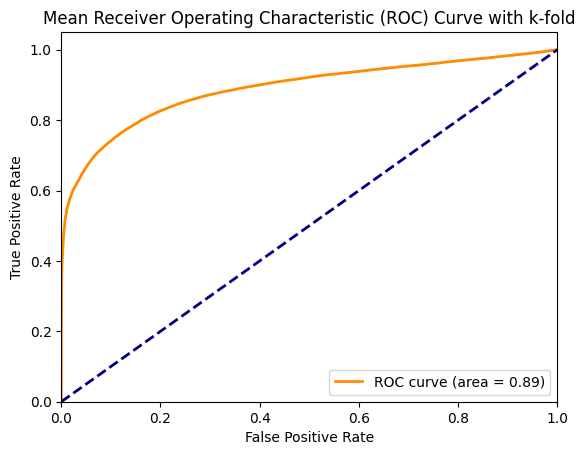

In [118]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prédire les probabilités de classe positive pour chaque exemple avec la validation croisée k-fold
y_probas = cross_val_predict(gaussian_full, proba_matrix, y, cv=kfold, method="predict_proba")

# Calculer les taux de faux positifs et de vrais positifs pour chaque pli
fpr, tpr, thresholds = roc_curve(y, y_probas[:, 1])

# Calculer l'aire sous la courbe ROC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC moyenne
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()

# Random Forests

In [120]:
forest = RandomForestClassifier(random_state=0)

In [115]:
forest.fit(X_train, y_train)
forest.predict(X_test)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.929


In [116]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=forest, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy = np.mean(cross_val_score(estimator=forest, X=X, y=y, scoring="accuracy", cv=kfold))
cross_val_accuracy_std = np.std(cross_val_score(estimator=forest, X=X, y=y, scoring="accuracy", cv=kfold))
print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_std}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

KeyboardInterrupt: 

In [ ]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=forest, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision = np.mean(cross_val_score(estimator=forest, X=X, y=y, scoring="precision", cv=kfold))
cross_val_precision_std = np.std(cross_val_score(estimator=forest, X=X, y=y, scoring="precision", cv=kfold))
print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_std}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

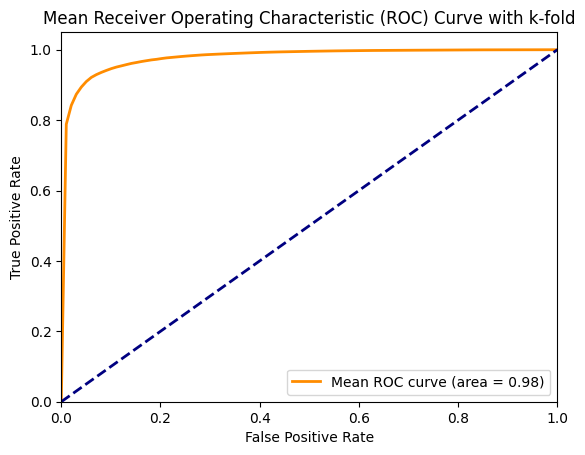

In [121]:


# Initialiser la validation croisée k-fold
kfold = KFold(n_splits=20, shuffle=True)

# Initialiser les listes pour stocker les résultats de la validation croisée
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

# Effectuer la validation croisée k-fold
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Entraîner le modèle sur l'ensemble d'entraînement du pli actuel
    forest.fit(X_train_fold, y_train_fold)
    
    # Obtenir les probabilités de prédiction pour la classe positive sur l'ensemble de test du pli actuel
    proba_matrix_fold = forest.predict_proba(X_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, proba_matrix_fold[:, 1])
    
    # Interpoler les taux de vrais positifs sur un ensemble de faux positifs uniformément répartis
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    
# Calculer la moyenne des taux de vrais positifs sur tous les plis
mean_tpr /= kfold.get_n_splits()

# Calculer l'aire sous la courbe ROC
roc_auc = auc(mean_fpr, mean_tpr)

# Tracer la courbe ROC moyenne
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()